In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('data/df_final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25848 entries, 0 to 25847
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 25848 non-null  object 
 1   city                    25848 non-null  object 
 2   state                   25848 non-null  object 
 3   postcode                25848 non-null  int64  
 4   latitude                25848 non-null  float64
 5   longitude               25848 non-null  float64
 6   bedroom_number          25848 non-null  int64  
 7   bathroom_number         25848 non-null  int64  
 8   square_meter            25848 non-null  int64  
 9   price                   25848 non-null  int64  
 10  household_number        25848 non-null  int64  
 11  household_mean_income   25848 non-null  int64  
 12  families_number         25848 non-null  int64  
 13  family_mean_income      25848 non-null  int64  
 14  non_family_number       25848 non-null

In [4]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending = False)

price                     1.000000
non_family_mean_income    0.418229
household_mean_income     0.366494
square_meter              0.361733
bathroom_number           0.349462
postcode                  0.330218
family_mean_income        0.296516
bedroom_number            0.234776
median_age                0.080463
25to34                    0.024043
non_family_number        -0.003537
35to44                   -0.003749
45to54                   -0.011441
55to59                   -0.044175
household_number         -0.046922
75to84                   -0.054811
population               -0.057003
65to74                   -0.059573
60to64                   -0.065549
families_number          -0.075762
20to24                   -0.089294
latitude                 -0.101964
longitude                -0.315682
Name: price, dtype: float64

In [5]:
columns_to_drop = ['household_mean_income', 'family_mean_income','25to34', 'non_family_number','35to44', 'families_number',
                   'non_family_number', '45to54', '55to59', 'household_number', '75to84', '65to74', '60to64', '20to24', 'median_age']
df.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [6]:
df.rename(columns={'non_family_mean_income': 'income', 'address':'street'}, inplace = True)

### Correlation

In [7]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending = False)

price              1.000000
income             0.418229
square_meter       0.361733
bathroom_number    0.349462
postcode           0.330218
bedroom_number     0.234776
population        -0.057003
latitude          -0.101964
longitude         -0.315682
Name: price, dtype: float64

In [8]:
df['income_cat'] = pd.cut(df['income'], bins= [30000., 50000, 60000, 80000, 100000., np.inf], labels = [1,2,3,4,5])

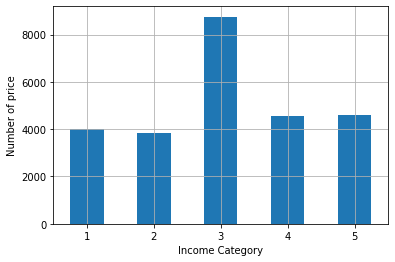

In [9]:
df['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Income Category')
plt.ylabel('Number of price')
plt.show()

In [10]:
df = df.dropna()

In [11]:
strat_train_set, strat_test_set = train_test_split(df, test_size = 0.2, stratify = df["income_cat"],random_state=42)

In [12]:
strat_train_set["income_cat"].value_counts() / len(strat_test_set)

3    1.360739
5    0.712342
4    0.707483
1    0.623712
2    0.595530
Name: income_cat, dtype: float64

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [14]:
df = strat_train_set.copy()

In [15]:
df

,street,city,state,postcode,latitude,longitude,bedroom_number,bathroom_number,square_meter,price,income,population
10363,Overland Avenue,Culver City,CA,90230,34.008440,-118.396230,2,2,89,689000,79946,33620
9263,Beaver Street,Sylmar,CA,91342,34.307690,-118.434670,3,2,106,450000,54344,92764
18243,Northwest at Pickwick - W - NS,Dallas,TX,75225,32.865765,-96.800400,1,1,76,325000,112602,21703
8641,Sea Cliff Way,Oceanside,CA,92056,33.200554,-117.308430,1,1,72,499950,69345,54045
13692,North Ridge Loop East,Eagle Mountain,UT,84005,40.363460,-111.978300,3,2,113,350000,80703,42222
...,...,...,...,...,...,...,...,...,...,...,...,...
13983,Rae Court,Buena Vista,CO,81211,38.834846,-106.149010,2,2,115,420000,45069,8156
1611,Admiralty Way,Lynnwood,WA,98087,47.861767,-122.275314,1,1,53,269999,81068,41958
7844,Wisteria Drive,Palm Desert,CA,92211,33.765380,-116.325874,3,3,151,699000,64192,26106
3545,South Kihei Road,Kihei,HI,96753,20.761880,-156.458300,1,1,60,938000,83478,29547


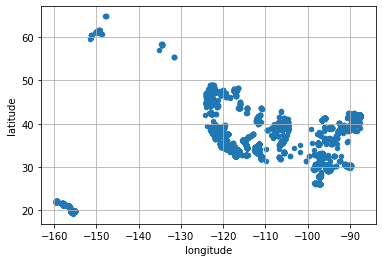

In [16]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True)
plt.show()

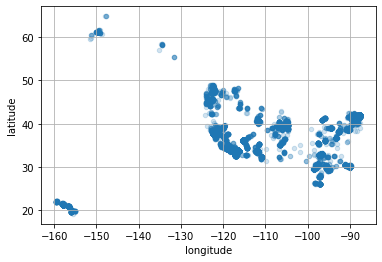

In [17]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, alpha = 0.2)
plt.show()

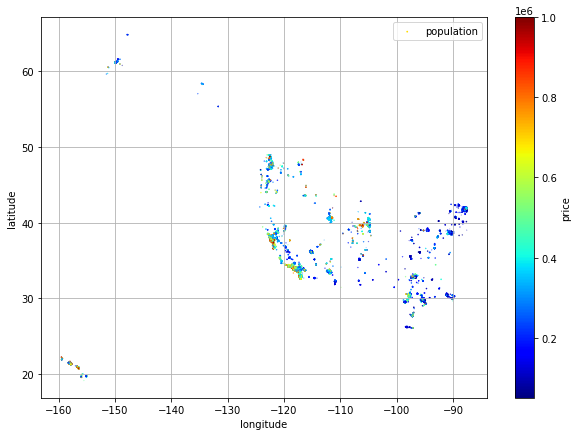

In [18]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, s = df["population"] / 100000,
        label = "population", c = "price", cmap = "jet", colorbar = True, legend=True, sharex=False,
        figsize=(10, 7))
plt.show()

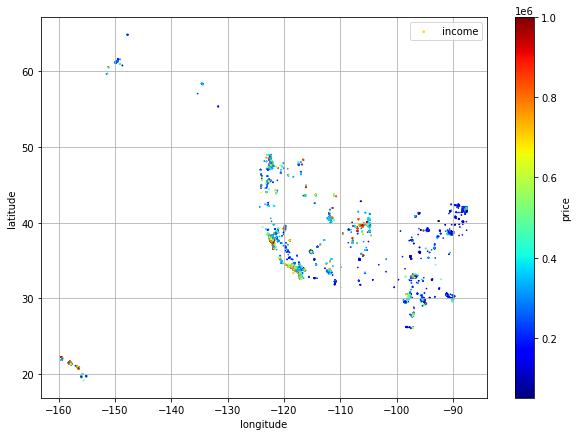

In [19]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, s = df["income"] / 100000,
        label = "income", c = "price", cmap = "jet", colorbar = True, legend=True, sharex=False,
        figsize=(10, 7))
plt.show()

In [20]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
income             0.415499
square_meter       0.363863
bathroom_number    0.346882
postcode           0.328013
bedroom_number     0.236784
population        -0.054857
latitude          -0.100782
longitude         -0.313823
Name: price, dtype: float64

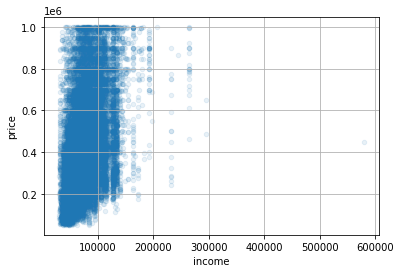

In [21]:
df.plot(kind = "scatter", x = "income", y = "price", alpha = 0.1, grid = True)
plt.show()

### Algorithm

In [22]:
df = strat_train_set.drop('price', axis = 1)
df_labels = strat_train_set['price'].copy()

In [23]:
df_num = df.select_dtypes(include=[np.number])

In [24]:
df_cat_state = df[['state']]
df_cat_city = df[['city']]
df_cat_street = df[['street']]

In [25]:
cat_encoder = OneHotEncoder()
df_state_1hot = cat_encoder.fit_transform(df_cat_state)
df_city_1hot = cat_encoder.fit_transform(df_cat_city)
df_street_1hot = cat_encoder.fit_transform(df_cat_street)

In [26]:
cat_encoder.categories_

[array(['(7364) Boulder Ave & 2nd St NB', '10 Mile Circle', '100 South',
        ..., 'ʻOlohana Street', 'ʻĀinamakua Drive', 'ʻŌhua Avenue'],
       dtype=object)]

In [27]:
df_state_1hot

<20579x21 sparse matrix of type '<class 'numpy.float64'>'
	with 20579 stored elements in Compressed Sparse Row format>

In [28]:
df_city_1hot

<20579x1179 sparse matrix of type '<class 'numpy.float64'>'
	with 20579 stored elements in Compressed Sparse Row format>

In [29]:
df_street_1hot

<20579x9029 sparse matrix of type '<class 'numpy.float64'>'
	with 20579 stored elements in Compressed Sparse Row format>

In [33]:
std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)

In [38]:
num_pipeline = make_pipeline(StandardScaler())